<a href="https://colab.research.google.com/github/giriprasath1012/PRODIGY_DS_03/blob/main/DS_Tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

#Loading Dataset

In [28]:
t_data=pd.read_csv("/content/drive/MyDrive/tweet_train.csv")
t_data.shape
print(t_data.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


#Data Preprocessing and Data Cleaning

In [29]:
t_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Remove patterns

In [33]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

Remove @users from tweet

In [34]:
t_data['clean_tweet'] = np.vectorize(remove_pattern)(t_data['tweet'], "@[\w]*")
t_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


Removing special characters, numbers and punctuations from tweet

In [35]:
t_data['clean_tweet'] = t_data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
t_data.head()

<ipython-input-35-c906212529f7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t_data['clean_tweet'] = t_data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


Removing Short words

In [36]:
t_data['clean_tweet'] = t_data['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
t_data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


# Exploratory Data Analysis

Peoples Reactions

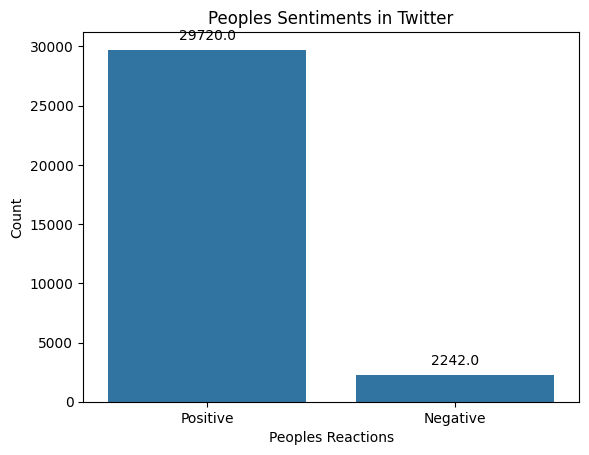

In [62]:
ax=sns.countplot(x='label',data=t_data)
plt.title("Peoples Sentiments in Twitter")
label=['Positive','Negative']
plt.xlabel("Peoples Reactions")
plt.ylabel("Count")
plt.xticks(ticks=[0,1],labels=label)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

 Visualization of frequent words

In [38]:
all_text = ' '.join(t_data['clean_tweet'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

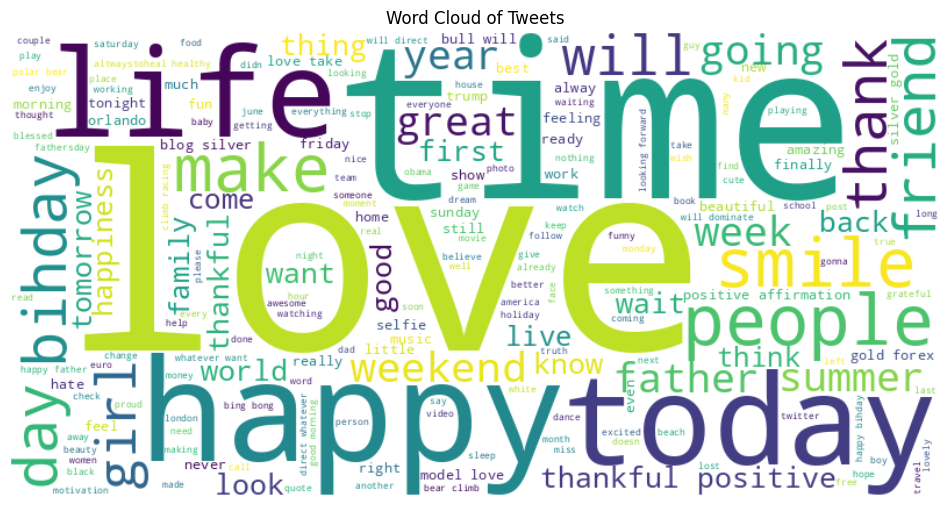

In [39]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

Visualization of frequent positive words

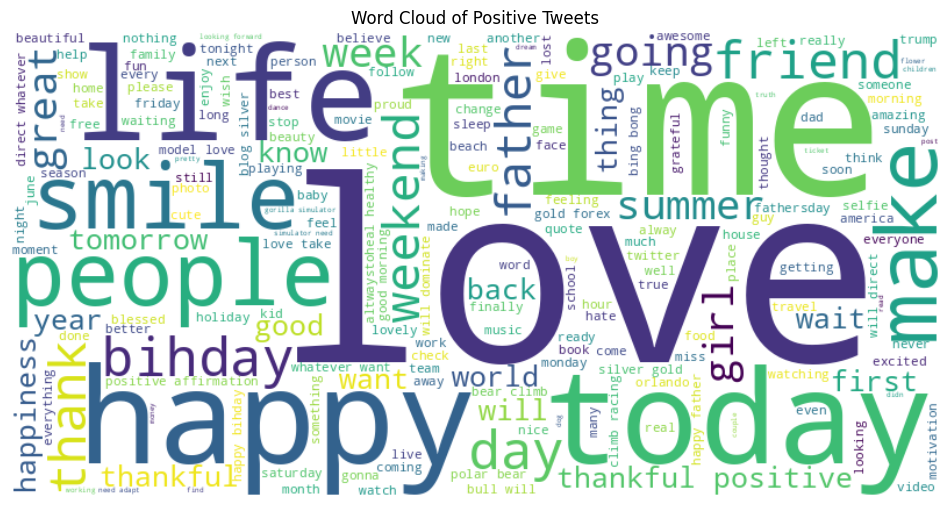

In [68]:
all_text = ' '.join(t_data['clean_tweet'].astype(str)[t_data['label']==0])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Tweets')
plt.show()

Visualization of frequent Negative words

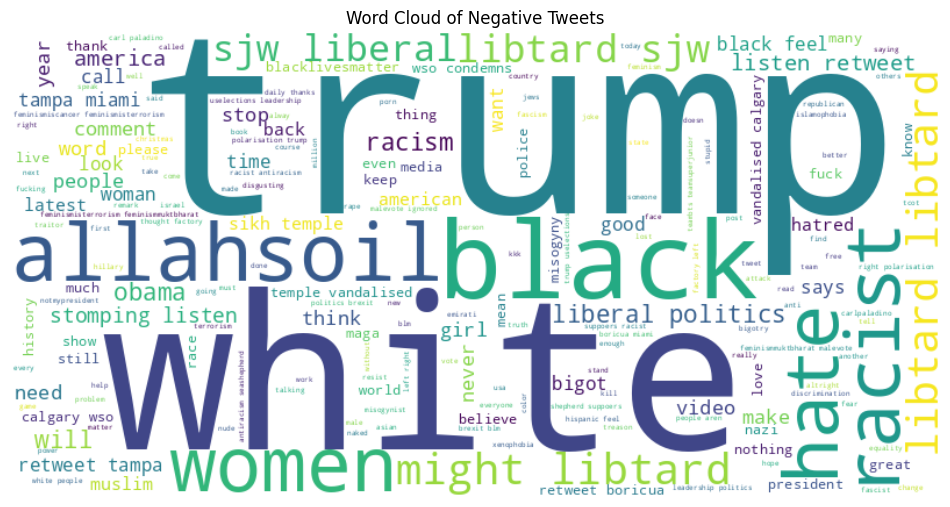

In [69]:
all_text = ' '.join(t_data['clean_tweet'].astype(str)[t_data['label']==1])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Tweets')
plt.show()

Extracting Hashtags from tweet

In [45]:
def hashtag_extract(tweets):
    hashtags = []

    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

Positive Hashtags

In [53]:
ht_positive = hashtag_extract(t_data['clean_tweet'][t_data['label']==0])
ht_positive = sum(ht_positive, [])
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365


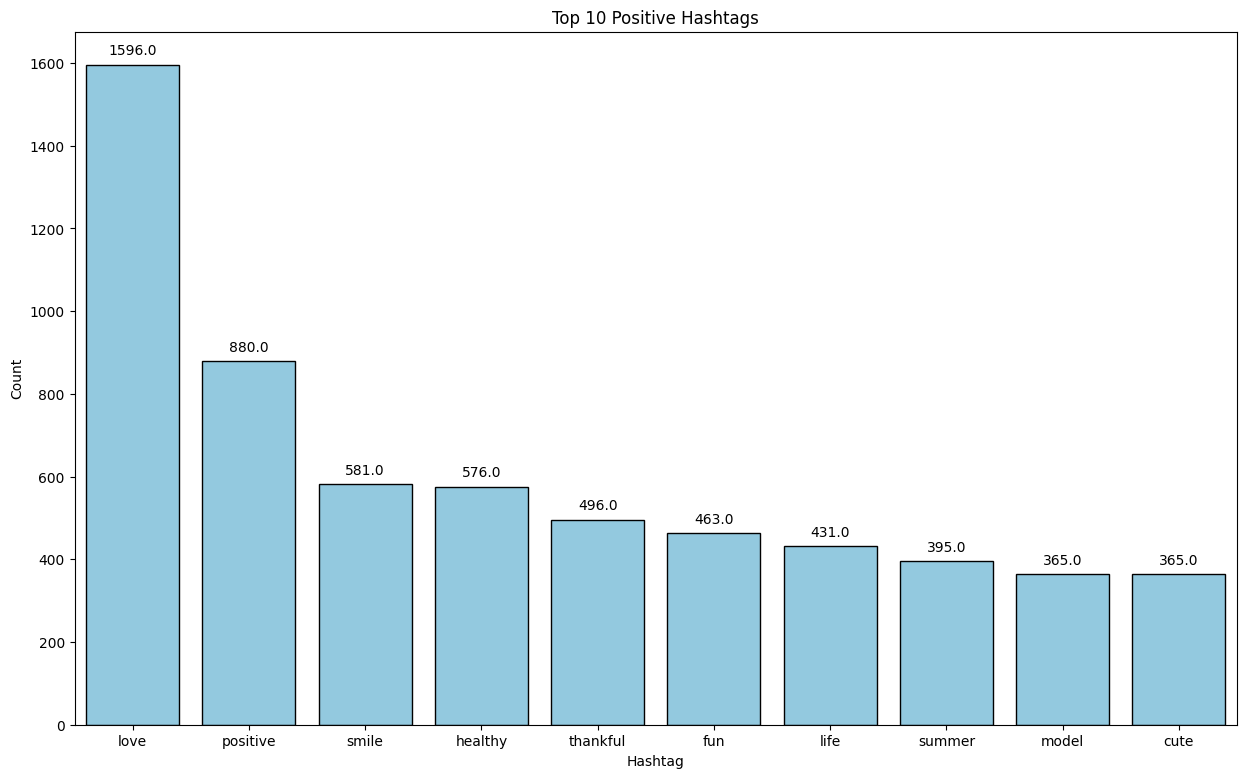

In [57]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
ax=sns.barplot(data=d, x='Hashtag', y='Count',color='skyblue',edgecolor='black')
plt.title("Top 10 Positive Hashtags")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Negative Hashtags

In [59]:
ht_negative = hashtag_extract(t_data['clean_tweet'][t_data['label']==1])
ht_negative = sum(ht_negative, [])

freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


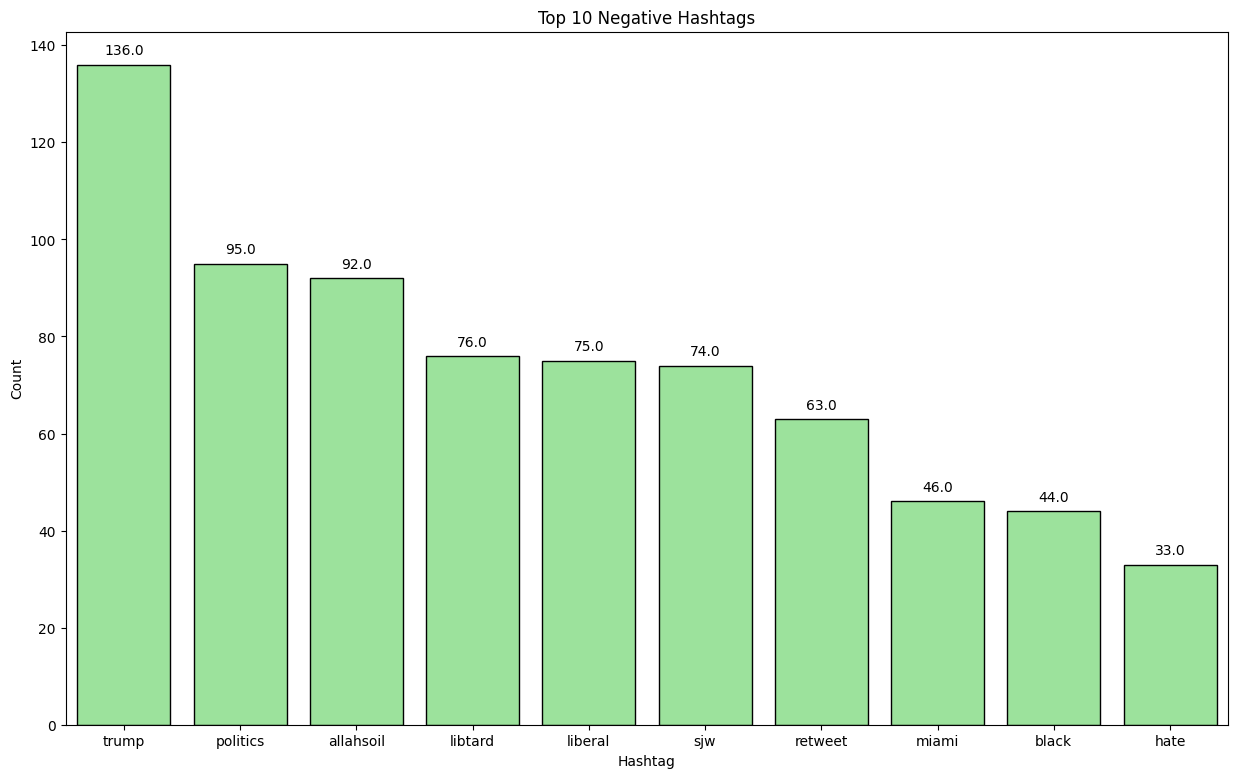

In [60]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
ax=sns.barplot(data=d, x='Hashtag', y='Count',color='lightgreen',edgecolor='black')
plt.title("Top 10 Negative Hashtags")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Sentiment Analysis of Tweets

In [64]:
t_data['Sentiment'] = t_data['clean_tweet'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

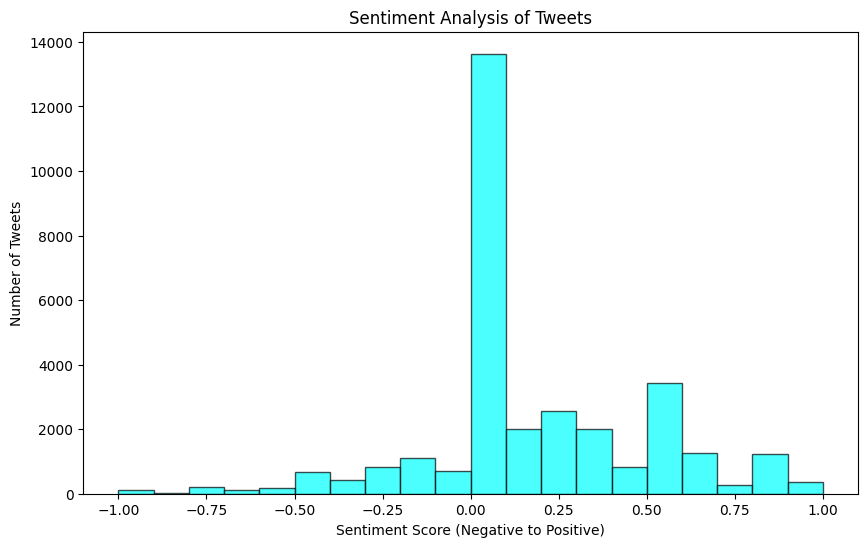

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(t_data['Sentiment'], bins=20, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment Score (Negative to Positive)')
plt.ylabel('Number of Tweets')
plt.show()